In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm


Note that for all algorithms, only the results for 10 of the 100 random runs (with different random initializations) are included in the uploaded directories, due to size constraint for uploading to the openreview system.

# analyze privacy-utility trade-off

In [2]:

M = 100

N = 29

mine_list = np.arange(0, N)

# file_list = np.arange(0, 100)
file_list = np.arange(0, 10)

inspect_list_1 = [[0.35, 22.0, 1.0],
                  [0.35, 22.0, 1.6],
                  [0.35, 22.0, 2.0],
                  [0.35, 22.0, 3.0],
               [0.35, 22.0, 4.0]]
privacies_1 = [15.17, 7.12, 5.14, 3.05, 2.16] # corrected

inspect_list_2 = [[0.10, 22.0, 1.0],
                  [0.15, 22.0, 1.0],
                [0.20, 22.0, 1.0],
                [0.25, 22.0, 1.0],
                [0.35, 22.0, 1.0]]
privacies_2 = [3.75, 5.98, 7.69, 9.82, 15.17] # corrected

inspect_list_all = [inspect_list_1, inspect_list_2]


### load results for DP-FTS-DE
all_mean_all = []
for i in range(2):
    inspect_list = inspect_list_all[i]
    all_mean_all_1 = []
    for params in inspect_list:
        q, S, z = params[0], params[1], params[2]
        mean_all = []
        for l in tqdm(mine_list):
            for itr in file_list:
                N_partitions = 4
                log_file_name = "results_dp_fts_de/agent_" + str(l) + "_iter_" + str(itr) + \
                        "_N_part_" + str(N_partitions) + "_q_" + str(q) + "_S_" + str(S) + "_z_" + str(z) + ".p"
                res = pickle.load(open(log_file_name, "rb"))
                values = res["all"]["values"]
                init = res["all"]["init"]["Y"]
                values = list(init) + values
                values_acc = np.maximum.accumulate(values)
                mean_all.append(1 - values_acc[69])
        all_mean_all_1.append(np.mean(mean_all))
    all_mean_all.append(all_mean_all_1)


### load results for TS
mean_all = []
for l in tqdm(mine_list):
    for itr in file_list:
        log_file_name = "results_ts/field_" + str(l) + "_iter_" + str(itr) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        mean_all.append(1 - values_acc[69])
all_mean_ts = np.mean(mean_all)

### load FTS-DE (P=4)
mean_all = []
for l in tqdm(mine_list):
    for itr in file_list:
        N_partitions = 4
        log_file_name = "results_dp_fts_de/agent_" + str(l) + "_iter_" + str(itr) + \
                "_N_part_" + str(N_partitions) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        mean_all.append(1 - values_acc[69])
all_mean_fts_de = np.mean(mean_all)

### load FTS
mean_all = []
for l in tqdm(mine_list):
    for itr in file_list:
        N_partitions = 1
        log_file_name = "results_dp_fts_de/agent_" + str(l) + "_iter_" + str(itr) + \
                "_N_part_" + str(N_partitions) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        mean_all.append(1 - values_acc[69])
all_mean_fts = np.mean(mean_all)



100%|██████████| 29/29 [00:00<00:00, 89.35it/s]


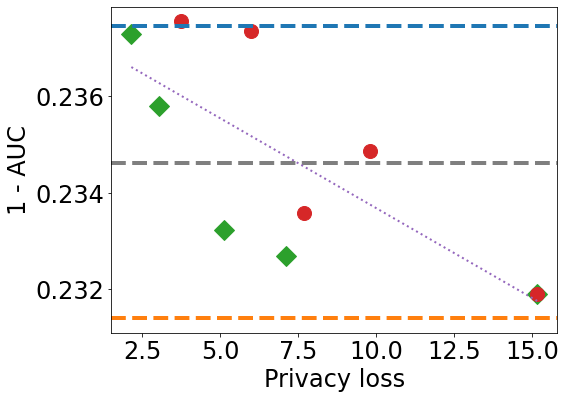

In [3]:

plt.rc('font', size=24)
plt.figure(figsize=(8, 6))

plt.rcParams["legend.framealpha"] = 0.3

marker_size = 14
plt.plot(privacies_1, all_mean_all[0], "tab:green", linestyle="None", marker="D", markersize=marker_size)
plt.plot(privacies_2, all_mean_all[1], "tab:red", linestyle="None", marker="o", markersize=marker_size)

plt.axhline(y=all_mean_ts, color='tab:blue', linestyle='--', linewidth=4)
plt.axhline(y=all_mean_fts, color='tab:gray', linestyle='--', linewidth=4)
plt.axhline(y=all_mean_fts_de, color='tab:orange', linestyle='--', linewidth=4)

x = privacies_1 + privacies_2
y = all_mean_all[0] + all_mean_all[1]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), linestyle=":", linewidth=2, color="tab:purple")

# plt.legend(("DP-FTS-DE (vary z)", "DP-FTS-DE (vary q)", "TS", "FTS", "FTS-DE"), prop={'size':21})

plt.xlabel("Privacy loss")
plt.ylabel("1 - AUC")

plt.show()


# analyze convergence

In [4]:

M = 100
N = 29

mine_list = np.arange(0, N)

all_mean = []

all_regrets_1 = []
all_regrets_2 = []
all_regrets_3 = []
all_regrets_4 = []
all_regrets_5 = []

all_ub = []
all_lb = []

# file_list = np.arange(0, 100)
file_list = np.arange(0, 10)

for l in tqdm(mine_list):
    for itr in file_list:
        log_file_name = "results_ts/field_" + str(l) + "_iter_" + str(itr) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        all_regrets_1.append(values_acc[:70])
        
        N_partitions = 4
        log_file_name = "results_dp_fts_de/agent_" + str(l) + "_iter_" + str(itr) + "_N_part_" + str(N_partitions) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        all_regrets_2.append(values_acc[:70])

        N_partitions = 4
        q, S, z = 0.35, 22.0, 1.0
        log_file_name = "results_dp_fts_de/agent_" + str(l) + "_iter_" + str(itr) + \
                "_N_part_" + str(N_partitions) + "_q_" + str(q) + "_S_" + str(S) + "_z_" + str(z) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        all_regrets_3.append(values_acc[:70])

        N_partitions = 4
        q, S, z = 0.35, 22.0, 2.0
        log_file_name = "results_dp_fts_de/agent_" + str(l) + "_iter_" + str(itr) + \
                "_N_part_" + str(N_partitions) + "_q_" + str(q) + "_S_" + str(S) + "_z_" + str(z) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        all_regrets_4.append(values_acc[:70])

        N_partitions = 4
        q, S, z = 0.25, 22.0, 1.0
        log_file_name = "results_dp_fts_de/agent_" + str(l) + "_iter_" + str(itr) + \
                "_N_part_" + str(N_partitions) + "_q_" + str(q) + "_S_" + str(S) + "_z_" + str(z) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        all_regrets_5.append(values_acc[:70])

all_regrets_1_np = 1 - np.array(all_regrets_1)
all_regrets_2_np = 1 - np.array(all_regrets_2)
all_regrets_3_np = 1 - np.array(all_regrets_3)
all_regrets_4_np = 1 - np.array(all_regrets_4)
all_regrets_5_np = 1 - np.array(all_regrets_5)

all_regrets_1_np_mean = np.mean(all_regrets_1_np, axis=0)
all_regrets_2_np_mean = np.mean(all_regrets_2_np, axis=0)
all_regrets_3_np_mean = np.mean(all_regrets_3_np, axis=0)
all_regrets_4_np_mean = np.mean(all_regrets_4_np, axis=0)
all_regrets_5_np_mean = np.mean(all_regrets_5_np, axis=0)

all_regrets_1_np_stderr = np.std(all_regrets_1_np, axis=0) / (np.sqrt(len(mine_list) * len(file_list)))
all_regrets_2_np_stderr = np.std(all_regrets_2_np, axis=0) / (np.sqrt(len(mine_list) * len(file_list)))
all_regrets_3_np_stderr = np.std(all_regrets_3_np, axis=0) / (np.sqrt(len(mine_list) * len(file_list)))
all_regrets_4_np_stderr = np.std(all_regrets_4_np, axis=0) / (np.sqrt(len(mine_list) * len(file_list)))
all_regrets_5_np_stderr = np.std(all_regrets_5_np, axis=0) / (np.sqrt(len(mine_list) * len(file_list)))

all_regrets_1_np_ub = all_regrets_1_np_mean + all_regrets_1_np_stderr
all_regrets_1_np_lb = all_regrets_1_np_mean - all_regrets_1_np_stderr
all_regrets_2_np_ub = all_regrets_2_np_mean + all_regrets_2_np_stderr
all_regrets_2_np_lb = all_regrets_2_np_mean - all_regrets_2_np_stderr
all_regrets_3_np_ub = all_regrets_3_np_mean + all_regrets_3_np_stderr
all_regrets_3_np_lb = all_regrets_3_np_mean - all_regrets_3_np_stderr
all_regrets_4_np_ub = all_regrets_4_np_mean + all_regrets_4_np_stderr
all_regrets_4_np_lb = all_regrets_4_np_mean - all_regrets_4_np_stderr
all_regrets_5_np_ub = all_regrets_5_np_mean + all_regrets_5_np_stderr
all_regrets_5_np_lb = all_regrets_5_np_mean - all_regrets_5_np_stderr

#     all_mean.append([all_regrets_1_np_mean, all_regrets_2_np_mean, all_regrets_3_np_mean, \
#                      all_regrets_4_np_mean, all_regrets_5_np_mean])

# all_mean = np.mean(np.array(all_mean), axis=0)



100%|██████████| 29/29 [00:01<00:00, 23.10it/s]


In [5]:

def plot_mean_and_CI_with_marker(time_steps, mean, lb, ub, color_mean=None, color_shading=None, marker=None, marker_size=12):
    plt.fill_between(time_steps, ub, lb,
                     color=color_shading, alpha=.2)
    plt.plot(time_steps, mean, color_mean, marker=marker, markersize=marker_size, markevery=8)


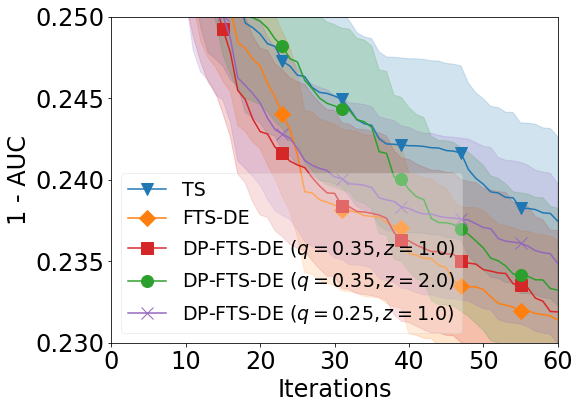

In [6]:

lw = 2.0
plt.rc('font', size=24)

plt.figure(figsize=(8, 6))
plt.rcParams["legend.framealpha"] = 0.3
plt.rcParams["legend.loc"] = "lower left"

color_list = ["tab:blue", "tab:orange", "tab:red", "tab:green", "tab:purple", "tab:gray", "tab:olive", "tab:cyan"]
marker_list = ["v", "D", "s", "o", "x", "^", "<", ">"]

inds = np.arange(1, 100)
plot_len = len(all_regrets_1_np_mean)

plot_mean_and_CI_with_marker(inds[:plot_len], all_regrets_1_np_mean[:plot_len], all_regrets_1_np_ub[:plot_len], all_regrets_1_np_lb[:plot_len], color_mean=color_list[0], color_shading=color_list[0], marker=marker_list[0], marker_size=12)
plot_mean_and_CI_with_marker(inds[:plot_len], all_regrets_2_np_mean[:plot_len], all_regrets_2_np_ub[:plot_len], all_regrets_2_np_lb[:plot_len], color_mean=color_list[1], color_shading=color_list[1], marker=marker_list[1], marker_size=12)
plot_mean_and_CI_with_marker(inds[:plot_len], all_regrets_3_np_mean[:plot_len], all_regrets_3_np_ub[:plot_len], all_regrets_3_np_lb[:plot_len], color_mean=color_list[2], color_shading=color_list[2], marker=marker_list[2], marker_size=12)
plot_mean_and_CI_with_marker(inds[:plot_len], all_regrets_4_np_mean[:plot_len], all_regrets_4_np_ub[:plot_len], all_regrets_4_np_lb[:plot_len], color_mean=color_list[3], color_shading=color_list[3], marker=marker_list[3], marker_size=12)
plot_mean_and_CI_with_marker(inds[:plot_len], all_regrets_5_np_mean[:plot_len], all_regrets_5_np_ub[:plot_len], all_regrets_5_np_lb[:plot_len], color_mean=color_list[4], color_shading=color_list[4], marker=marker_list[4], marker_size=12)

plt.legend(("TS", "FTS-DE", "DP-FTS-DE ($q=0.35,z=1.0$)", "DP-FTS-DE ($q=0.35,z=2.0$)", \
            "DP-FTS-DE ($q=0.25,z=1.0$)"), prop={'size':19})

plt.xticks(np.array([1, 10, 20, 30, 40, 50, 60, 70]), np.array([1, 10, 20, 30, 40, 50, 60, 70])-10)
axes = plt.gca()
axes.set_xlim([10, 70])
axes.set_ylim([0.23, 0.25])


plt.ylabel("1 - AUC")
plt.xlabel("Iterations")

plt.show()
